In [ ]:

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
#Load data
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

y = y.astype(np.uint8)
#Setup training and testing split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=60000, test_size=10000, shuffle=False)

print('x training shape =', x_train.shape)
print('y training shape =', y_train.shape)
print('x testing shape =', x_test.shape)
print('y testing shape =', y_test.shape)

x training shape = (60000, 784)
y training shape = (60000,)
x testing shape = (10000, 784)
y testing shape = (10000,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [ ]:
clf_ogparams = MLPClassifier(hidden_layer_sizes=(1,3), activation='logistic', solver='sgd', alpha=0.25, max_iter=1)
clf_ogparams.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.25, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(1,1000,), activation='logistic', solver='sgd', alpha=0.002, random_state=1, max_iter=300)

clf.fit(x_train, y_train)


MLPClassifier(activation='logistic', alpha=0.002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1, 1000), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Original Parameter Results
0.1135
0.1


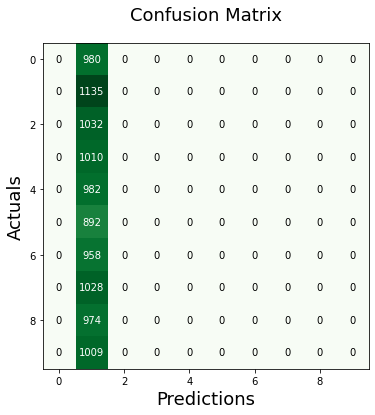

In [ ]:
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
predictions = clf.predict(x_test)
ogpredictions = clf_ogparams.predict(x_test)
sco = accuracy_score(y_test, ogpredictions)
cmo = confusion_matrix(y_test, ogpredictions)
rso = recall_score(y_test, ogpredictions, average='macro')
sc = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
rs = recall_score(y_test, predictions, average='macro')

print("Original Parameter Results")
print(sco)
print(rso)
fig, ax = plot_confusion_matrix(conf_mat=cmo, figsize=(6,6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Updated Model Results
0.2043
0.19495985579354932


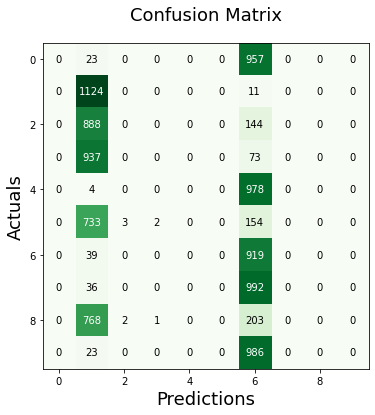

In [ ]:


print("Updated Model Results")
print(sc)
print(rs)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6,6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
